In [0]:
import pandas as pd
import numpy as np

## Pobieranie danych

Dane z repozytorium github, filmy ocenione na filmwebie

In [1]:
!wget -O oceny.csv https://raw.githubusercontent.com/mateuszrusin/ml-filmweb-score/master/oceny.csv

--2019-10-30 08:37:56--  https://raw.githubusercontent.com/mateuszrusin/ml-filmweb-score/master/oceny.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97619 (95K) [text/plain]
Saving to: ‘oceny.csv’

oceny.csv           100%[===================>]  95.33K  --.-KB/s    in 0.04s   

2019-10-30 08:37:56 (2.47 MB/s) - ‘oceny.csv’ saved [97619/97619]



Baza danych imdb ze strony https://www.imdb.com/interfaces/

In [2]:
!wget https://datasets.imdbws.com/title.basics.tsv.gz
!wget https://datasets.imdbws.com/title.ratings.tsv.gz

--2019-10-30 08:37:58--  https://datasets.imdbws.com/title.basics.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 13.226.42.104, 13.226.42.50, 13.226.42.43, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|13.226.42.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111878882 (107M) [binary/octet-stream]
Saving to: ‘title.basics.tsv.gz’

title.basics.tsv.gz 100%[===================>] 106.70M  68.2MB/s    in 1.6s    

2019-10-30 08:38:00 (68.2 MB/s) - ‘title.basics.tsv.gz’ saved [111878882/111878882]

--2019-10-30 08:38:01--  https://datasets.imdbws.com/title.ratings.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 13.226.42.104, 13.226.42.50, 13.226.42.43, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|13.226.42.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4867364 (4.6M) [binary/octet-stream]
Saving to: ‘title.ratings.tsv.gz’

title.ratings.tsv.g 100%[===================>]   4

### Rozpakowywanie

In [0]:
!gzip -d -f title.basics.tsv.gz
!gzip -d -f title.ratings.tsv.gz

### Pobieranie do DataFrame

In [49]:
oceny = pd.read_csv('oceny.csv')
oceny.head()

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data
0,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11
1,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,"Biograficzny, Kryminał, Thriller",2019-10-6
2,753119,Prosta historia o morderstwie,NaN,2016,NaN,3,NaN,Polska,"Kryminał, Thriller",2019-10-5
3,797600,"Ciemno, prawie noc",NaN,2019,NaN,2,NaN,Polska,"Kryminał, Thriller",2019-10-5
4,460220,Wyznania zakupoholiczki,Confessions of a Shopaholic,2009,NaN,3,NaN,USA,Komedia rom.,2019-10-4


otwarcie danych `.tsv` do pliku

In [7]:
imdb_title = pd.read_csv('title.basics.tsv', sep='\t')
imdb_title.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
6267463,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
6267464,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
6267465,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
6267466,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
6267467,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Animation,Comedy,Family"


Otwarcie danych z ocenami w imdb

In [8]:
imdb_raiting = pd.read_csv('title.ratings.tsv', sep='\t')
imdb_raiting.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1544
1,tt0000002,6.1,186
2,tt0000003,6.5,1202
3,tt0000004,6.2,114
4,tt0000005,6.1,1920


Połączenie danych ocen i filmu

In [65]:
imdb = pd.merge(imdb_title, imdb_raiting, how='left',on='tconst')
imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1544.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,186.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1202.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.2,114.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,1920.0


Przykład filmu o tym samym tytule i tym samym roku.

In [10]:
imdb[(imdb['originalTitle'] == 'Joker')& (imdb['startYear'] == '2019')]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
1286596,tt10556334,movie,Joker,Joker,0,2019,\N,92,Documentary,NaN,NaN
1548412,tt11010430,tvEpisode,Joker,Joker,0,2019,\N,\N,Talk-Show,6.8,6.0
1574540,tt11055460,tvEpisode,Joker,Joker,0,2019,\N,12,"Comedy,Talk-Show",7.4,7.0
1581668,tt11067740,tvEpisode,Joker,Joker,0,2019,\N,\N,"Comedy,Talk-Show",NaN,NaN
1581672,tt11067748,tvEpisode,Joker,Joker,0,2019,\N,\N,Talk-Show,NaN,NaN
1581688,tt11067776,tvEpisode,Joker,Joker,0,2019,\N,\N,Talk-Show,NaN,NaN
1583313,tt11070632,tvEpisode,Joker,Joker,0,2019,\N,\N,Talk-Show,NaN,NaN
1583520,tt11070984,tvEpisode,Joker,Joker,0,2019,\N,\N,Comedy,NaN,NaN
1584519,tt11072680,tvEpisode,Joker,Joker,0,2019,\N,\N,Comedy,NaN,NaN
1592173,tt11086026,tvEpisode,Joker,Joker,0,2019,\N,28,"Comedy,Talk-Show",7.3,7.0


## KONWERSJA kolumn

Do połączenia `pd.merge` wymagane są kolumny o tych samych nazwach i typach, dlatego rok konwertujemy na tekst.

In [50]:
# konwersja do liczb
# UNKNOW_TEXT = '-unknow-'
#oceny.fillna(UNKNOW_TEXT, inplace=True)

oceny['originalTitle'] = oceny['Tytuł oryginalny']
oceny['startYear'] = oceny['Rok produkcji'].astype(str)

oceny.head()

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,originalTitle,startYear
0,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,NaN,2019
1,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,"Biograficzny, Kryminał, Thriller",2019-10-6,"Extremely Wicked, Shockingly Evil and Vile",2019
2,753119,Prosta historia o morderstwie,NaN,2016,NaN,3,NaN,Polska,"Kryminał, Thriller",2019-10-5,NaN,2016
3,797600,"Ciemno, prawie noc",NaN,2019,NaN,2,NaN,Polska,"Kryminał, Thriller",2019-10-5,NaN,2019
4,460220,Wyznania zakupoholiczki,Confessions of a Shopaholic,2009,NaN,3,NaN,USA,Komedia rom.,2019-10-4,Confessions of a Shopaholic,2009


Dla pustych wartości `originalTitle` dodajemy tytuł polski


In [51]:
oceny['originalTitle'] = oceny['originalTitle'].fillna(oceny['Tytuł polski'])
oceny.head()

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,originalTitle,startYear
0,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Joker,2019
1,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,"Biograficzny, Kryminał, Thriller",2019-10-6,"Extremely Wicked, Shockingly Evil and Vile",2019
2,753119,Prosta historia o morderstwie,NaN,2016,NaN,3,NaN,Polska,"Kryminał, Thriller",2019-10-5,Prosta historia o morderstwie,2016
3,797600,"Ciemno, prawie noc",NaN,2019,NaN,2,NaN,Polska,"Kryminał, Thriller",2019-10-5,"Ciemno, prawie noc",2019
4,460220,Wyznania zakupoholiczki,Confessions of a Shopaholic,2009,NaN,3,NaN,USA,Komedia rom.,2019-10-4,Confessions of a Shopaholic,2009


Uzupełniamy puste wartości

In [0]:
#oceny.fillna(UNKNOW_TEXT, inplace=True)
#oceny.head()

Tłumaczymy kategorię, tak że kategoria po polsku z `filmweb` jest kategorią odpowiadają z imdb

In [79]:
match = {
    'Dramat': 'Drama',
    'Kryminał': 'Crime',
    'Komedia': 'Comedy',
    'Akcja': 'Action',
    'Biograficzny': 'Biographic',
    'Romans': 'Romance'
}

def change_type(t):
  text_list = t.replace(' ','').split(',')
  arr = [match[s] if s in match else s for s in text_list]
  return ", ".join(arr)

oceny['genre_eng'] = oceny.apply(lambda x: change_type(x['Gatunek']), axis=1)
oceny.head()

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,originalTitle,startYear,genre_eng
0,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Joker,2019,"Drama, Crime, Action"
1,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,"Biograficzny, Kryminał, Thriller",2019-10-6,"Extremely Wicked, Shockingly Evil and Vile",2019,"Biographic, Crime, Thriller"
2,753119,Prosta historia o morderstwie,NaN,2016,NaN,3,NaN,Polska,"Kryminał, Thriller",2019-10-5,Prosta historia o morderstwie,2016,"Crime, Thriller"
3,797600,"Ciemno, prawie noc",NaN,2019,NaN,2,NaN,Polska,"Kryminał, Thriller",2019-10-5,"Ciemno, prawie noc",2019,"Crime, Thriller"
4,460220,Wyznania zakupoholiczki,Confessions of a Shopaholic,2009,NaN,3,NaN,USA,Komedia rom.,2019-10-4,Confessions of a Shopaholic,2009,Komediarom.


In [54]:
print(oceny.dtypes)

ID                    int64
Tytuł polski         object
Tytuł oryginalny     object
Rok produkcji         int64
Ulubione             object
Ocena                object
Komentarz           float64
Kraj produkcji       object
Gatunek              object
Data                 object
originalTitle        object
startYear            object
genre_eng            object
dtype: object


In [55]:
oceny[(oceny['originalTitle']=='Joker') & (oceny['startYear']=='2019')]

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,originalTitle,startYear,genre_eng
0,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Joker,2019,"Drama, Crime, Action"


## Połączenie z IMDB

Łączymy tylko ten tekst który w imdb, ma `titleType`==`movie`,  inaczej mogą powstać duplikaty. Łączymy po roku i oryignalnym tytule). Najpierw usuwamy z `imdb` także puste wartości rok albo originalny tytuł.

In [73]:
print(len(imdb))
imdb = imdb.dropna(subset=['startYear','originalTitle'])
imdb = imdb[imdb['titleType']=='movie']
imdb.head()

6267457


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.4,81.0
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,307.0
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama",6.1,40.0
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,NaN,NaN
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.1,534.0


In [161]:
oceny_imdb = pd.merge(
    oceny,
    imdb,
    how='inner',
    on=['startYear','originalTitle'])
print(len(oceny_imdb))
oceny_imdb.head()

1121


,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,originalTitle,startYear,genre_eng,tconst,titleType,primaryTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Joker,2019,"Drama, Crime, Action",tt10556334,movie,Joker,0,\N,92,Documentary,NaN,NaN
1,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Joker,2019,"Drama, Crime, Action",tt7286456,movie,Joker,0,\N,122,"Crime,Drama,Thriller",8.8,390737.0
2,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,"Biograficzny, Kryminał, Thriller",2019-10-6,"Extremely Wicked, Shockingly Evil and Vile",2019,"Biographic, Crime, Thriller",tt2481498,movie,"Extremely Wicked, Shockingly Evil and Vile",0,\N,110,"Biography,Crime,Drama",6.6,56228.0
3,753119,Prosta historia o morderstwie,NaN,2016,NaN,3,NaN,Polska,"Kryminał, Thriller",2019-10-5,Prosta historia o morderstwie,2016,"Crime, Thriller",tt6182864,movie,Prosta historia o morderstwie,0,\N,89,"Crime,Thriller",5.9,226.0
4,797600,"Ciemno, prawie noc",NaN,2019,NaN,2,NaN,Polska,"Kryminał, Thriller",2019-10-5,"Ciemno, prawie noc",2019,"Crime, Thriller",tt7790894,movie,"Dark, Almost Night",0,\N,114,"Crime,Drama",4.6,265.0


 Nadal znajdują się duplikaty. Ponieważ rok i tytuł nie jest jednoznaczny w IMDB

In [162]:
print('Zduplikowane: ', len(oceny_imdb[oceny_imdb.duplicated(subset=['originalTitle'])]))
oceny_imdb[oceny_imdb['originalTitle']=='Joker']

Zduplikowane:  38


,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,originalTitle,startYear,genre_eng,tconst,titleType,primaryTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Joker,2019,"Drama, Crime, Action",tt10556334,movie,Joker,0,\N,92,Documentary,NaN,NaN
1,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Joker,2019,"Drama, Crime, Action",tt7286456,movie,Joker,0,\N,122,"Crime,Drama,Thriller",8.8,390737.0


Patrzymy po gatunku i wyznaczymy jak bardzo jeden gatunek jest podobny do drugiego. Jak widać najbardziej podobny do filmu Joker, jest Ten z dwoma  identycznymi kategoriami.

In [163]:
def get_similarity(row):
  text_list_eng = row['genre_eng'].replace(' ','').split(',')
  text_list_genres = row['genres'].replace(' ','').split(',')

  val = sum([1 if x in text_list_genres else 0 for x in text_list_eng])
  #print(row['originalTitle'],val, text_list_eng, text_list_genres)
  return val

oceny_imdb['similarity'] = oceny_imdb.apply(get_similarity,axis=1)
oceny_duplicated = oceny_imdb[oceny_imdb.duplicated(subset=['originalTitle'], keep=False)]
oceny_duplicated

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,originalTitle,startYear,genre_eng,tconst,titleType,primaryTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes,similarity
0,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Joker,2019,"Drama, Crime, Action",tt10556334,movie,Joker,0,\N,92,Documentary,NaN,NaN,0
1,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Joker,2019,"Drama, Crime, Action",tt7286456,movie,Joker,0,\N,122,"Crime,Drama,Thriller",8.8,390737.0,2
25,7967,Na fali,Point Break,1991,NaN,7,NaN,USA,Sensacyjny,2019-8-8,Point Break,1991,Sensacyjny,tt0102685,movie,Point Break,0,\N,122,"Action,Crime,Thriller",7.3,143472.0,0
44,785673,Kochanek idealny,Zoe,2018,NaN,4,NaN,USA,Romans,2019-5-13,Zoe,2018,Romance,tt5969746,movie,Zoe,0,\N,95,Mystery,NaN,NaN,0
45,785673,Kochanek idealny,Zoe,2018,NaN,4,NaN,USA,Romans,2019-5-13,Zoe,2018,Romance,tt6010628,movie,Zoe,0,\N,104,"Romance,Sci-Fi",6.1,6009.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,490841,Zeszłej nocy,Last Night,2010,NaN,6,NaN,"Francja, USA",Melodramat,2012-11-8,Last Night,2010,Melodramat,tt1294688,movie,Last Night,0,\N,93,"Drama,Romance",6.6,45169.0,0
812,490841,Zeszłej nocy,Last Night,2010,NaN,6,NaN,"Francja, USA",Melodramat,2012-11-8,Last Night,2010,Melodramat,tt1740794,movie,Last Night,0,\N,69,"Drama,Romance",NaN,NaN,0
901,619088,Zamiana,Switch,2011,NaN,6,NaN,Francja,"Thriller, Akcja",2012-1-9,Switch,2011,"Thriller, Action",tt1401636,movie,Switch,0,\N,104,"Action,Crime,Thriller",6.3,3094.0,2
902,619088,Zamiana,Switch,2011,NaN,6,NaN,Francja,"Thriller, Akcja",2012-1-9,Switch,2011,"Thriller, Action",tt2326252,movie,Switch,0,\N,80,Documentary,NaN,NaN,0


Zostawaiamy te oceny które mają najwyższe `similarity` i odrzucamy inne

In [168]:
top1 = oceny_imdb.groupby(['ID']).apply(lambda x: x.sort_values(["similarity"], ascending = False)).reset_index(drop=True)
oceny_imdb2 = top1.groupby('ID').head(1).copy()

oceny_imdb2[oceny_imdb2['originalTitle']=='Joker']

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,originalTitle,startYear,genre_eng,tconst,titleType,primaryTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes,similarity
1104,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Joker,2019,"Drama, Crime, Action",tt7286456,movie,Joker,0,\N,122,"Crime,Drama,Thriller",8.8,390737.0,2


## KONWERSJA na dane liczbowe

Zmieniamy typ roku producji i oceny na typ liczbowy



In [169]:
oceny_imdb2["Rok produkcji"] =  oceny_imdb2["Rok produkcji"].astype(float)
oceny_imdb2[oceny_imdb2["Ocena"]=='brak oceny'] = np.nan
oceny_imdb2["Ocena"] = oceny_imdb2["Ocena"].astype(float)

oceny_imdb2[oceny_imdb2['originalTitle']=='Joker']

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,originalTitle,startYear,genre_eng,tconst,titleType,primaryTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes,similarity
1104,810167.0,Joker,NaN,2019.0,NaN,7.0,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Joker,2019,"Drama, Crime, Action",tt7286456,movie,Joker,0.0,\N,122,"Crime,Drama,Thriller",8.8,390737.0,2.0


Zapisanie average rating wartości zero.

In [170]:
#oceny_imdb[oceny_imdb["averageRating"]=='-unknow-'] = '0'
oceny_imdb2[['averageRating']] = oceny_imdb2[['averageRating']].fillna(value=0)
oceny_imdb2[['averageRating_int']]  = oceny_imdb2[['averageRating']].round().astype(int)

print(oceny_imdb2[['averageRating_int']].dtypes)

averageRating_int    int64
dtype: object


Sprawdzenie jakie wartości może przyjmować

In [173]:
oceny_imdb2['averageRating_int'].unique()

array([8, 7, 6, 9, 4, 5, 0, 3])

## PLOT

https://python-graph-gallery.com/

## SEABORN

https://python-graph-gallery.com/41-control-marker-features/

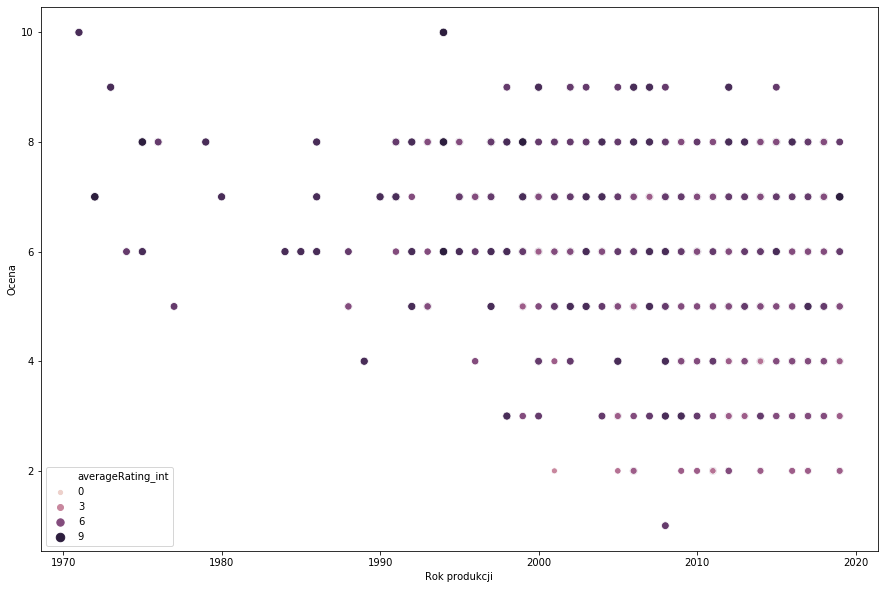

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

sns.scatterplot(x=oceny_imdb2["Rok produkcji"], 
                y=oceny_imdb2["Ocena"],
                size = oceny_imdb2["averageRating_int"],
                hue= oceny_imdb2["averageRating_int"],
                marker="o")